<a href="https://colab.research.google.com/github/xsansha/PySpark-Workshop/blob/main/Data_Processing_with_PySpark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Data Processing?

It is simply processing the data. **_Wait, what?_**

**Processing the data for following:**

- Wrangling

- EDA

- Machine Learning

## Pre-requisites for using PySpark

### a. Install the following

* Java

* Spark

### b. Set environment variables

* `JAVA_HOME`

* `SPARK_HOME`

---

**Voila! 🥂 you are good to go.**

### Installation

In [1]:
!ls

sample_data


In [2]:
# Installing Java

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
# Downloading Spark

!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

In [4]:
# Uncompressing the tar

!tar xvf spark-3.2.0-bin-hadoop3.2.tgz

spark-3.2.0-bin-hadoop3.2/
spark-3.2.0-bin-hadoop3.2/NOTICE
spark-3.2.0-bin-hadoop3.2/kubernetes/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/python_executable_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/autoscale.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning_cleanup.py
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/decom.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.2.0-bin-hadoop3.2/kubernetes/docker

### Defining environment variables

In [5]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.2.0-bin-hadoop3.2"

### Validating installation

In [6]:
!pip install -q findspark

In [7]:
import findspark

findspark.init()

In [8]:
findspark.find()

'spark-3.2.0-bin-hadoop3.2'

# Let's get it started 🚀

### a. Downloading dataset

In [9]:
!wget https://raw.githubusercontent.com/xsansha/Retail-Analytics/main/data/csv/buyers_transaction.csv

--2021-11-09 12:45:54--  https://raw.githubusercontent.com/xsansha/Retail-Analytics/main/data/csv/buyers_transaction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48039726 (46M) [text/plain]
Saving to: ‘buyers_transaction.csv’

buyers_transaction. 100%[===================>]  45.81M   237MB/s    in 0.2s    

2021-11-09 12:45:56 (237 MB/s) - ‘buyers_transaction.csv’ saved [48039726/48039726]



In [10]:
!ls -ltr

total 340844
drwxr-xr-x 13 1000 1000      4096 Oct  6 13:18 spark-3.2.0-bin-hadoop3.2
-rw-r--r--  1 root root 300965906 Oct  6 13:50 spark-3.2.0-bin-hadoop3.2.tgz
drwxr-xr-x  1 root root      4096 Nov  1 13:35 sample_data
-rw-r--r--  1 root root  48039726 Nov  9 12:45 buyers_transaction.csv


### b. Time to show some Spark (PySpark) 🙂

In [11]:
import pyspark

pyspark.__version__

'3.2.0'

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *

import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [13]:
sc = SparkSession.builder.appName("pyspark_test").getOrCreate()

#### Defining config

In [14]:
sc.conf.set("spark.sql.execution.arrow.enabled", "true")

#### i. Loading CSV

In [15]:
df = sc.read.csv("buyers_transaction.csv", header=True, inferSchema=True)

In [16]:
type(df)

pyspark.sql.dataframe.DataFrame

#### ii. Inspecting head and tail of Dataframe

In [17]:
# By default it is set to show 20 records
df.show()

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United Kingdom|
|   536365|    21730|GLASS S

In [18]:
df.show(5)

+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
only showing top 5 rows



In [19]:
df.tail(5)

[Row(InvoiceNo='581587', StockCode='22613', Description='PACK OF 20 SPACEBOY NAPKINS', Quantity=12, InvoiceDate='2011-12-09 12:50:00', UnitPrice=0.85, CustomerID=12680.0, Country='France'),
 Row(InvoiceNo='581587', StockCode='22899', Description="CHILDREN'S APRON DOLLY GIRL ", Quantity=6, InvoiceDate='2011-12-09 12:50:00', UnitPrice=2.1, CustomerID=12680.0, Country='France'),
 Row(InvoiceNo='581587', StockCode='23254', Description='CHILDRENS CUTLERY DOLLY GIRL ', Quantity=4, InvoiceDate='2011-12-09 12:50:00', UnitPrice=4.15, CustomerID=12680.0, Country='France'),
 Row(InvoiceNo='581587', StockCode='23255', Description='CHILDRENS CUTLERY CIRCUS PARADE', Quantity=4, InvoiceDate='2011-12-09 12:50:00', UnitPrice=4.15, CustomerID=12680.0, Country='France'),
 Row(InvoiceNo='581587', StockCode='22138', Description='BAKING SET 9 PIECE RETROSPOT ', Quantity=3, InvoiceDate='2011-12-09 12:50:00', UnitPrice=4.95, CustomerID=12680.0, Country='France')]

**Note:** `tail()` is introduced from `PySpark 3.0.0`

#### iii. Inspecting dataset schema

In [20]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [21]:
df.dtypes

[('InvoiceNo', 'string'),
 ('StockCode', 'string'),
 ('Description', 'string'),
 ('Quantity', 'int'),
 ('InvoiceDate', 'string'),
 ('UnitPrice', 'double'),
 ('CustomerID', 'double'),
 ('Country', 'string')]

#### iv. Row count

In [22]:
df.count()

541909

#### v. List of columns

In [23]:
df.columns

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

#### vi. Renaming columns

In [24]:
df1 = df.select(
    F.col("InvoiceNo").alias("invoice_no"),
    F.col("StockCode").alias("stock_code"),
    F.col("Description").alias("description"),
    F.col("Quantity").alias("quantity"),
    F.col("InvoiceDate").alias("invoice_date"),
    F.col("UnitPrice").alias("unit_price"),
    F.col("CustomerID").alias("customer_id"),
    F.col("Country").alias("country"))

df1.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|       country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|    17850.0|United Kingdom|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|    17850.0|United Kingdom|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------

In [25]:
cols_name_mapping = [
    F.col("InvoiceNo").alias("invoice_no"),
    F.col("StockCode").alias("stock_code"),
    F.col("Description").alias("description"),
    F.col("Quantity").alias("quantity"),
    F.col("InvoiceDate").alias("invoice_date"),
    F.col("UnitPrice").alias("unit_price"),
    F.col("CustomerID").alias("customer_id"),
    F.col("Country").alias("country")
]

df2 = df.select(*cols_name_mapping)

df2.show(5)

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|       country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|    17850.0|United Kingdom|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|    17850.0|United Kingdom|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------

#### vii. Changing data type of columns

In [26]:
df1.printSchema()

root
 |-- invoice_no: string (nullable = true)
 |-- stock_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- invoice_date: string (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- country: string (nullable = true)



In [27]:
# Single column
df3 = df1.withColumn("invoice_date", F.col("invoice_date").cast(TimestampType()))

df3.printSchema()

root
 |-- invoice_no: string (nullable = true)
 |-- stock_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- quantity: integer (nullable = true)
 |-- invoice_date: timestamp (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- country: string (nullable = true)



In [28]:
# Multiple columns via chaining

df4 = df1.withColumn("invoice_date", F.col("invoice_date").cast(TimestampType())) \
  .withColumn("quantity", F.col("quantity").cast(FloatType()))

df4.printSchema()

root
 |-- invoice_no: string (nullable = true)
 |-- stock_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- quantity: float (nullable = true)
 |-- invoice_date: timestamp (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- country: string (nullable = true)



#### viii. Wrangling the dataframe

In [29]:
df3.createOrReplaceTempView("sales")

In [30]:
sc.sql("""
  SELECT *
  FROM sales
  LIMIT 5
""").show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|       country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------------+
|    536365|    85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|      2.55|    17850.0|United Kingdom|
|    536365|     71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|      2.75|    17850.0|United Kingdom|
|    536365|    84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
|    536365|    84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|      3.39|    17850.0|United Kingdom|
+----------+----------+--------------------+--------+-------------------+----------+-----------+--------

##### a. Selecting specific columns

In [31]:
sc.sql("""
SELECT invoice_date, unit_price, country
FROM sales
""").show()

+-------------------+----------+--------------+
|       invoice_date|unit_price|       country|
+-------------------+----------+--------------+
|2010-12-01 08:26:00|      2.55|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      2.75|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      7.65|United Kingdom|
|2010-12-01 08:26:00|      4.25|United Kingdom|
|2010-12-01 08:28:00|      1.85|United Kingdom|
|2010-12-01 08:28:00|      1.85|United Kingdom|
|2010-12-01 08:34:00|      1.69|United Kingdom|
|2010-12-01 08:34:00|       2.1|United Kingdom|
|2010-12-01 08:34:00|       2.1|United Kingdom|
|2010-12-01 08:34:00|      3.75|United Kingdom|
|2010-12-01 08:34:00|      1.65|United Kingdom|
|2010-12-01 08:34:00|      4.25|United Kingdom|
|2010-12-01 08:34:00|      4.95|United Kingdom|
|2010-12-01 08:34:00|      9.95|United Kingdom|
|2010-12-01 08:34:00|      5.95|United K

In [32]:
df3.select("invoice_date", "unit_price", "country").show()

+-------------------+----------+--------------+
|       invoice_date|unit_price|       country|
+-------------------+----------+--------------+
|2010-12-01 08:26:00|      2.55|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      2.75|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      3.39|United Kingdom|
|2010-12-01 08:26:00|      7.65|United Kingdom|
|2010-12-01 08:26:00|      4.25|United Kingdom|
|2010-12-01 08:28:00|      1.85|United Kingdom|
|2010-12-01 08:28:00|      1.85|United Kingdom|
|2010-12-01 08:34:00|      1.69|United Kingdom|
|2010-12-01 08:34:00|       2.1|United Kingdom|
|2010-12-01 08:34:00|       2.1|United Kingdom|
|2010-12-01 08:34:00|      3.75|United Kingdom|
|2010-12-01 08:34:00|      1.65|United Kingdom|
|2010-12-01 08:34:00|      4.25|United Kingdom|
|2010-12-01 08:34:00|      4.95|United Kingdom|
|2010-12-01 08:34:00|      9.95|United Kingdom|
|2010-12-01 08:34:00|      5.95|United K

##### c. Sorting the data

In [33]:
sc.sql("""
  SELECT *
  FROM sales
  ORDER BY country, invoice_date
""").show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+---------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|  country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+---------+
|    536389|    85014A|BLACK/BLUE POLKAD...|       3|2010-12-01 10:03:00|      5.95|    12431.0|Australia|
|    536389|     22726|ALARM CLOCK BAKEL...|       4|2010-12-01 10:03:00|      3.75|    12431.0|Australia|
|    536389|     22727|ALARM CLOCK BAKEL...|       4|2010-12-01 10:03:00|      3.75|    12431.0|Australia|
|    536389|     22196|SMALL HEART MEASU...|      24|2010-12-01 10:03:00|      0.85|    12431.0|Australia|
|    536389|    85014B|RED RETROSPOT UMB...|       6|2010-12-01 10:03:00|      5.95|    12431.0|Australia|
|    536389|    35004C|SET OF 3 COLOURED...|       6|2010-12-01 10:03:00|      5.45|    12431.0|Australia|
|    536389|     22941|CHRISTMAS LIGH

In [34]:
df3.sort("country", "invoice_date", ascending=[1, 0]).show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+---------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|  country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+---------+
|    578459|     22338|STAR DECORATION P...|      96|2011-11-24 12:30:00|      0.19|    12388.0|Australia|
|    578459|     22576|SWALLOW WOODEN CH...|      20|2011-11-24 12:30:00|      0.85|    12388.0|Australia|
|    578459|     22910|PAPER CHAIN KIT V...|      20|2011-11-24 12:30:00|      2.95|    12388.0|Australia|
|    578459|     22580|ADVENT CALENDAR G...|      12|2011-11-24 12:30:00|      5.95|    12388.0|Australia|
|    578459|     22669|   RED BABY BUNTING |      12|2011-11-24 12:30:00|      2.95|    12388.0|Australia|
|    578459|     22600|CHRISTMAS RETROSP...|      20|2011-11-24 12:30:00|      0.85|    12388.0|Australia|
|    578459|     22086|PAPER CHAIN KI

##### d. Unique values of a column

In [35]:
sc.sql("""
  SELECT DISTINCT country
  FROM sales
  ORDER BY country
""").show()

+------------------+
|           country|
+------------------+
|         Australia|
|           Austria|
|           Bahrain|
|           Belgium|
|            Brazil|
|            Canada|
|   Channel Islands|
|            Cyprus|
|    Czech Republic|
|           Denmark|
|              EIRE|
|European Community|
|           Finland|
|            France|
|           Germany|
|            Greece|
|         Hong Kong|
|           Iceland|
|            Israel|
|             Italy|
+------------------+
only showing top 20 rows



In [36]:
df3.select("country").distinct().sort("country").show()

+------------------+
|           country|
+------------------+
|         Australia|
|           Austria|
|           Bahrain|
|           Belgium|
|            Brazil|
|            Canada|
|   Channel Islands|
|            Cyprus|
|    Czech Republic|
|           Denmark|
|              EIRE|
|European Community|
|           Finland|
|            France|
|           Germany|
|            Greece|
|         Hong Kong|
|           Iceland|
|            Israel|
|             Italy|
+------------------+
only showing top 20 rows



##### e. Applying aggregation

In [37]:
sc.sql("""
  SELECT 
        MAX(unit_price) AS max_unit_price, 
        MAX(quantity) AS max_quantity
  FROM sales
""").show()

+--------------+------------+
|max_unit_price|max_quantity|
+--------------+------------+
|       38970.0|       80995|
+--------------+------------+



In [38]:
df3.select(
    F.max(F.col("unit_price")).alias("max_unit_price"),
    F.max(F.col("quantity")).alias("max_quantity")).show()

+--------------+------------+
|max_unit_price|max_quantity|
+--------------+------------+
|       38970.0|       80995|
+--------------+------------+



In [39]:
sc.sql("""
  SELECT country, MAX(unit_price) AS max_unit_price
  FROM sales
  GROUP BY country
  ORDER BY max_unit_price DESC
""").show()

+---------------+--------------+
|        country|max_unit_price|
+---------------+--------------+
| United Kingdom|       38970.0|
|         France|       4161.06|
|      Singapore|       3949.32|
|      Hong Kong|       2653.95|
|           EIRE|        1917.0|
|          Spain|       1715.85|
|       Portugal|       1241.98|
|         Norway|         700.0|
|        Germany|         599.5|
|         Canada|        550.94|
|      Australia|         350.0|
|         Cyprus|        320.69|
|          Italy|         300.0|
|Channel Islands|         293.0|
|        Finland|         275.6|
|    Netherlands|         206.4|
|         Israel|         125.0|
|          Malta|          65.0|
|         Greece|          50.0|
|          Japan|         45.57|
+---------------+--------------+
only showing top 20 rows



In [40]:
max_price_by_country = df3.groupBy("country").agg(F.max(F.col("unit_price")).alias("max_unit_price"))
max_price_by_country = max_price_by_country.sort("max_unit_price", ascending=[0])

max_price_by_country.show()

+---------------+--------------+
|        country|max_unit_price|
+---------------+--------------+
| United Kingdom|       38970.0|
|         France|       4161.06|
|      Singapore|       3949.32|
|      Hong Kong|       2653.95|
|           EIRE|        1917.0|
|          Spain|       1715.85|
|       Portugal|       1241.98|
|         Norway|         700.0|
|        Germany|         599.5|
|         Canada|        550.94|
|      Australia|         350.0|
|         Cyprus|        320.69|
|          Italy|         300.0|
|Channel Islands|         293.0|
|        Finland|         275.6|
|    Netherlands|         206.4|
|         Israel|         125.0|
|          Malta|          65.0|
|         Greece|          50.0|
|          Japan|         45.57|
+---------------+--------------+
only showing top 20 rows



In [41]:
sc.sql("""
  SELECT country, COUNT(*) AS total_records
  FROM sales
  GROUP BY country
  ORDER BY total_records DESC
""").show()

+---------------+-------------+
|        country|total_records|
+---------------+-------------+
| United Kingdom|       495478|
|        Germany|         9495|
|         France|         8557|
|           EIRE|         8196|
|          Spain|         2533|
|    Netherlands|         2371|
|        Belgium|         2069|
|    Switzerland|         2002|
|       Portugal|         1519|
|      Australia|         1259|
|         Norway|         1086|
|          Italy|          803|
|Channel Islands|          758|
|        Finland|          695|
|         Cyprus|          622|
|         Sweden|          462|
|    Unspecified|          446|
|        Austria|          401|
|        Denmark|          389|
|          Japan|          358|
+---------------+-------------+
only showing top 20 rows



##### f. Filtering by single column

In [42]:
germany_sql_df = sc.sql("""
  SELECT *
  FROM sales
  WHERE country = 'Germany'
  ORDER BY invoice_date
""")

germany_sql_df.show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|    536527|     20713|      JUMBO BAG OWLS|      10|2010-12-01 13:04:00|      1.95|    12662.0|Germany|
|    536527|     22242|5 HOOK HANGER MAG...|      12|2010-12-01 13:04:00|      1.65|    12662.0|Germany|
|    536527|     22809|SET OF 6 T-LIGHTS...|       6|2010-12-01 13:04:00|      2.95|    12662.0|Germany|
|    536527|     22837|HOT WATER BOTTLE ...|       4|2010-12-01 13:04:00|      4.65|    12662.0|Germany|
|    536527|      POST|             POSTAGE|       1|2010-12-01 13:04:00|      18.0|    12662.0|Germany|
|    536527|     22969|HOMEMADE JAM SCEN...|      12|2010-12-01 13:04:00|      1.45|    12662.0|Germany|
|    536527|     22549|    PICTURE DOMINOES|      12|20

In [43]:
germany_df = df3.where(F.col("country") == "Germany")
germany_df = germany_df.sort("invoice_date")

germany_df.show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|    536527|     20713|      JUMBO BAG OWLS|      10|2010-12-01 13:04:00|      1.95|    12662.0|Germany|
|    536527|     22242|5 HOOK HANGER MAG...|      12|2010-12-01 13:04:00|      1.65|    12662.0|Germany|
|    536527|     22809|SET OF 6 T-LIGHTS...|       6|2010-12-01 13:04:00|      2.95|    12662.0|Germany|
|    536527|     22837|HOT WATER BOTTLE ...|       4|2010-12-01 13:04:00|      4.65|    12662.0|Germany|
|    536527|      POST|             POSTAGE|       1|2010-12-01 13:04:00|      18.0|    12662.0|Germany|
|    536527|     22969|HOMEMADE JAM SCEN...|      12|2010-12-01 13:04:00|      1.45|    12662.0|Germany|
|    536527|     22549|    PICTURE DOMINOES|      12|20

##### g. Filtering by multiple columns

In [44]:
sc.sql("""
  SELECT *
  FROM sales
  WHERE country = 'Germany'
    AND description LIKE '%FRAME%'
  ORDER BY invoice_date
""").show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|   C536548|     22767|TRIPLE PHOTO FRAM...|      -2|2010-12-01 14:33:00|      9.95|    12472.0|Germany|
|    537995|    82494L|WOODEN FRAME ANTI...|       6|2010-12-09 11:39:00|      2.95|    12712.0|Germany|
|    540769|     82482|WOODEN PICTURE FR...|      12|2011-01-11 10:38:00|      2.55|    12601.0|Germany|
|    540900|    82494L|WOODEN FRAME ANTI...|      12|2011-01-12 11:46:00|      2.95|    12712.0|Germany|
|    540900|     82482|WOODEN PICTURE FR...|      12|2011-01-12 11:46:00|      2.55|    12712.0|Germany|
|    542648|     21137|BLACK RECORD COVE...|       4|2011-01-31 11:46:00|      3.75|    12476.0|Germany|
|    542713|     21137|BLACK RECORD COVE...|       4|20

In [45]:
germany_frame_df = df3.where(
    (F.col("country") == "Germany") & 
    (F.col("description").contains("FRAME")))

germany_frame_df = germany_frame_df.sort("invoice_date")

germany_frame_df.show()

+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|invoice_no|stock_code|         description|quantity|       invoice_date|unit_price|customer_id|country|
+----------+----------+--------------------+--------+-------------------+----------+-----------+-------+
|   C536548|     22767|TRIPLE PHOTO FRAM...|      -2|2010-12-01 14:33:00|      9.95|    12472.0|Germany|
|    537995|    82494L|WOODEN FRAME ANTI...|       6|2010-12-09 11:39:00|      2.95|    12712.0|Germany|
|    540769|     82482|WOODEN PICTURE FR...|      12|2011-01-11 10:38:00|      2.55|    12601.0|Germany|
|    540900|    82494L|WOODEN FRAME ANTI...|      12|2011-01-12 11:46:00|      2.95|    12712.0|Germany|
|    540900|     82482|WOODEN PICTURE FR...|      12|2011-01-12 11:46:00|      2.55|    12712.0|Germany|
|    542648|     21137|BLACK RECORD COVE...|       4|2011-01-31 11:46:00|      3.75|    12476.0|Germany|
|    542713|     21137|BLACK RECORD COVE...|       4|20

### c. Visualization

#### Can we plot a PySpark dataframe?

Cannot plot because the values are of type DataFrame


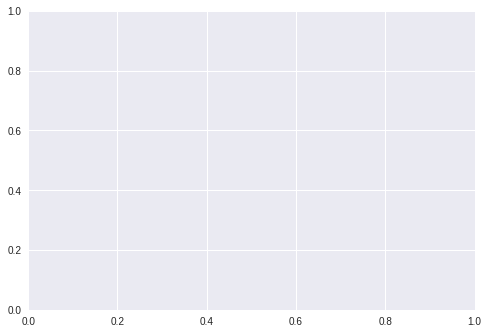

In [46]:
try:
  plt.plot(germany_frame_df.select("invoice_date"), germany_frame_df.select("unit_price"))
  plt.show()

except ValueError:
  print("Cannot plot because the values are of type DataFrame")

##### Solution

In [47]:
germany_pd_df = germany_frame_df.toPandas()

display(germany_pd_df.head())

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,C536548,22767,TRIPLE PHOTO FRAME CORNICE,-2,2010-12-01 14:33:00,9.95,12472.0,Germany
1,537995,82494L,WOODEN FRAME ANTIQUE WHITE,6,2010-12-09 11:39:00,2.95,12712.0,Germany
2,540769,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-01-11 10:38:00,2.55,12601.0,Germany
3,540900,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-01-12 11:46:00,2.55,12712.0,Germany
4,540900,82494L,WOODEN FRAME ANTIQUE WHITE,12,2011-01-12 11:46:00,2.95,12712.0,Germany


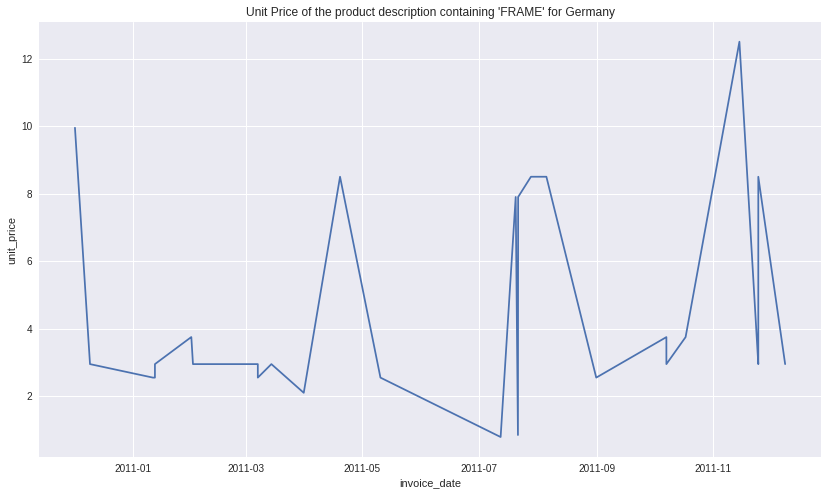

In [48]:
plt.figure(figsize=(14, 8))

plt.plot(germany_pd_df["invoice_date"], germany_pd_df["unit_price"])
plt.xlabel("invoice_date")
plt.ylabel("unit_price")
plt.title("Unit Price of the product description containing 'FRAME' for Germany", fontsize=12)
plt.show()